# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Ramadhan]
- **Email:** [ramadhanalmuktafi@gmail.com]
- **ID Dicoding:** [Ramadhan]

## Menentukan Pertanyaan Bisnis

- Berapa nilai rata-rata skor untuk setiap produk.
- Apakah terdapat tren peningkatan atau penurunan skor ulasan dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [17]:
# URL dataset order items
url_order_items = "https://raw.githubusercontent.com/aQueenBee/Data-Analysis-E-Commerce-Public-Dataset/Data-Analysis-E-Commerce-Public-Dataset/data/order_items_dataset.csv"
order_items = pd.read_csv(url_order_items)
# URL dataset order reviews
url_order_reviews = "https://raw.githubusercontent.com/aQueenBee/Data-Analysis-E-Commerce-Public-Dataset/Data-Analysis-E-Commerce-Public-Dataset/data/order_reviews_dataset.csv"
order_reviews = pd.read_csv(url_order_reviews)

# Melihat lima baris pertama dari setiap dataset
print("Order Items Dataset:")
print(order_items.head())

print("\nOrder Reviews Dataset:")
print(order_reviews.head())

Order Items Dataset:
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18 

### Assessing Data

In [18]:
# Menampilkan dimensi data dari setiap dataset
print("Dimensi Order Items Dataset:", order_items.shape)
print("Dimensi Order Reviews Dataset:", order_reviews.shape)

# Menampilkan tipe data dari setiap kolom dalam setiap dataset
print("\nTipe Data Order Items Dataset:")
print(order_items.dtypes)

print("\nTipe Data Order Reviews Dataset:")
print(order_reviews.dtypes)

# Menampilkan jumlah missing value untuk setiap kolom dalam setiap dataset
print("\nJumlah Missing Value dalam Order Items Dataset:")
print(order_items.isnull().sum())

print("\nJumlah Missing Value dalam Order Reviews Dataset:")
print(order_reviews.isnull().sum())

# Memeriksa nilai skor di luar rentang 0 hingga 5
invalid_score = order_reviews[(order_reviews['review_score'] < 0) | (order_reviews['review_score'] > 5)]

# Menampilkan nilai-nilai yang tidak valid
if not invalid_score.empty:
    print("\nNilai skor di luar rentang 0 hingga 5 ditemukan:")
    print(invalid_score)
else:
    print("\nTidak ada nilai skor di luar rentang 0 hingga 5.")

# Memeriksa duplikat data dalam dataset order_items
duplicate_order_items = order_items[order_items.duplicated()]

# Memeriksa duplikat data dalam dataset order_reviews
duplicate_order_reviews = order_reviews[order_reviews.duplicated()]

# Menampilkan duplikat data, jika ada
if not duplicate_order_items.empty:
    print("\nDuplikat data ditemukan dalam dataset order_items:")
    print(duplicate_order_items)
else:
    print("\nTidak ada duplikat data dalam dataset order_items.")

if not duplicate_order_reviews.empty:
    print("\nDuplikat data ditemukan dalam dataset order_reviews:")
    print(duplicate_order_reviews)
else:
    print("\nTidak ada duplikat data dalam dataset order_reviews.")

Dimensi Order Items Dataset: (112650, 7)
Dimensi Order Reviews Dataset: (99224, 7)

Tipe Data Order Items Dataset:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Tipe Data Order Reviews Dataset:
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

Jumlah Missing Value dalam Order Items Dataset:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah Missing Value dalam Order Reviews Dataset:
review_id                      0
order_id                       0
review_score  

### Cleaning Data

In [19]:
# Menampilkan dimensi data dari setiap dataset
print("Dimensi Order Items Dataset:", order_items.shape)
print("Dimensi Order Reviews Dataset:", order_reviews.shape)

# Mengambil kolom yang diperlukan dari dataset order_items
selected_columns = order_items.loc[:, ['order_id', 'product_id']]
print(selected_columns.head())

print()

# Mengambil kolom yang diperlukan dari dataset order_reviews
order_reviews_subset = order_reviews[['order_id', 'review_score', 'review_creation_date']]
print(order_reviews_subset.head())

Dimensi Order Items Dataset: (112650, 7)
Dimensi Order Reviews Dataset: (99224, 7)
                           order_id                        product_id
0  00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61
1  00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f
2  000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd
3  00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc
4  00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089

                           order_id  review_score review_creation_date
0  73fc7af87114b39712e6da79b0a377eb             4  2018-01-18 00:00:00
1  a548910a1c6147796b98fdf73dbeba33             5  2018-03-10 00:00:00
2  f9e4b658b201a9f2ecdecbb34bed034b             5  2018-02-17 00:00:00
3  658677c97b385a9be170737859d3511b             5  2017-04-21 00:00:00
4  8e6bfb81e283fa7e4f11123a3fb894f1             5  2018-03-01 00:00:00


dikarenakan sebelumnya memang tidak ada missing value pada skor untuk menganalisis rata-rata skor pada setiap produk dan fluktuasi tren. Maka tidak ada yang berubah dari proses data sebelumnya. Dan untuk missing value pada comment tidak saya lakukan tindakan karena tidak dibutuhkan pada proses analisis selanjutnya. Kemudian hanya mengambil kolom data yang diperlukan saja.

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
# Statistik Deskriptif
order_items.describe()
order_reviews.describe()

#1. Berapa nilai rata-rata skor untuk setiap produk.
# Gabungkan dataset order_review dan order_dataset item berdasarkan kolom order_id
merged_data = pd.merge(order_items[['order_id', 'product_id']],
                       order_reviews[['order_id', 'review_score']],
                       on='order_id',
                       how='inner')

# Hitung nilai rata-rata skor ulasan untuk setiap produk
average_scores_per_product = merged_data.groupby('product_id')['review_score'].mean().reset_index()

# Tampilkan dataframe rata-rata skor produk
print("Rata-rata skor ulasan untuk setiap produk:")
print(average_scores_per_product.head)

#2. Apakah terdapat tren peningkatan atau penurunan skor ulasan dari waktu ke waktu?
# Konversi kolom review_creation_date ke format datetime
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])

# Ekstrak tahun dari kolom review_creation_date
order_reviews['year'] = order_reviews['review_creation_date'].dt.year

# Kelompokkan data berdasarkan tahun dan hitung rata-rata skor ulasan untuk setiap tahun
average_scores_time = order_reviews.groupby('year')['review_score'].mean().reset_index()

# Print dataframe yang berisi rata-rata skor ulasan untuk setiap tahun
print("Rata-rata skor ulasan untuk setiap tahun:")
print(average_scores_time)

Rata-rata skor ulasan untuk setiap produk:
<bound method NDFrame.head of                              product_id  review_score
0      00066f42aeeb9f3007548bb9d3f33c38           5.0
1      00088930e925c41fd95ebfe695fd2655           4.0
2      0009406fd7479715e4bef61dd91f2462           1.0
3      000b8f95fcb9e0096488278317764d19           5.0
4      000d9be29b5207b54e86aa1b1ac54872           5.0
...                                 ...           ...
32784  fff6177642830a9a94a0f2cba5e476d1           4.5
32785  fff81cc3158d2725c0655ab9ba0f712c           4.0
32786  fff9553ac224cec9d15d49f5a263411f           5.0
32787  fffdb2d0ec8d6a61f0a0a0db3f25b441           5.0
32788  fffe9eeff12fcbd74a2f2b007dde0c58           4.0

[32789 rows x 2 columns]>
Rata-rata skor ulasan untuk setiap tahun:
   year  review_score
0  2016      3.550769
1  2017      4.109489
2  2018      4.071968


## Visualization & Explanatory Analysis

### Pertanyaan 1:

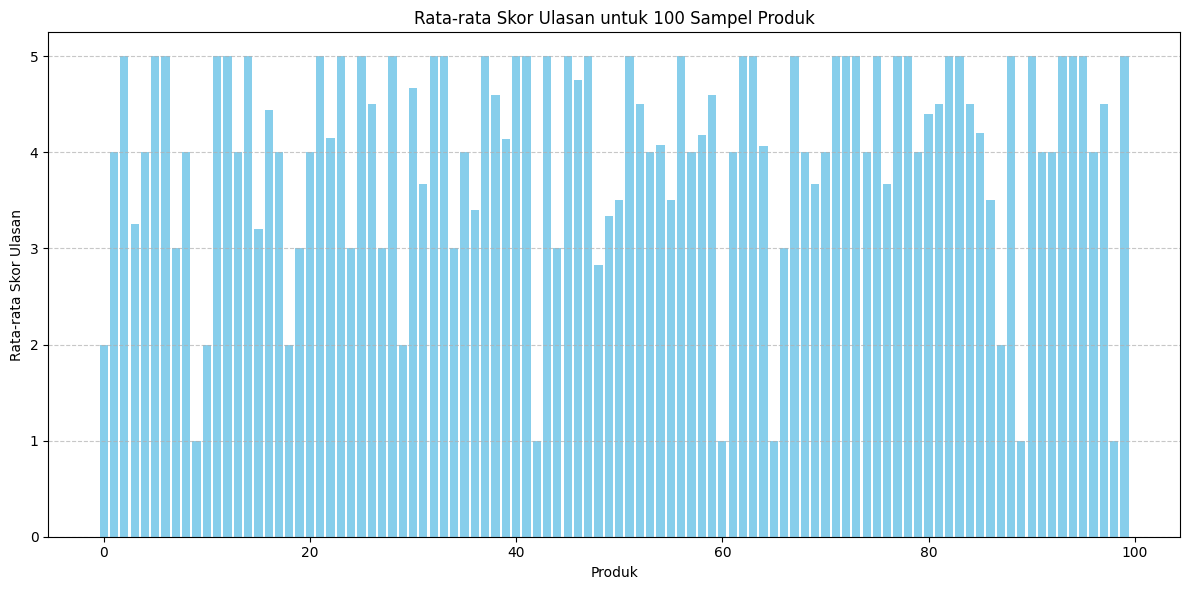

In [14]:
# Ambil 100 sampel produk secara acak
sampled_products = average_scores_per_product.sample(n=100, random_state=42)

# Plot bar plot dari sampel data
plt.figure(figsize=(12, 6))
plt.bar(range(len(sampled_products)), sampled_products['review_score'], color='skyblue')
plt.xlabel('Produk')  # Memberikan label kosong pada sumbu x
plt.ylabel('Rata-rata Skor Ulasan')
plt.title('Rata-rata Skor Ulasan untuk 100 Sampel Produk')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pengambilan 100 sample dimaksudkan supaya generate visualisasi lebih ringkas, tidak memakan waktu dan lebih mudah dilihat perbedaan grafiknya.

### Pertanyaan 2:

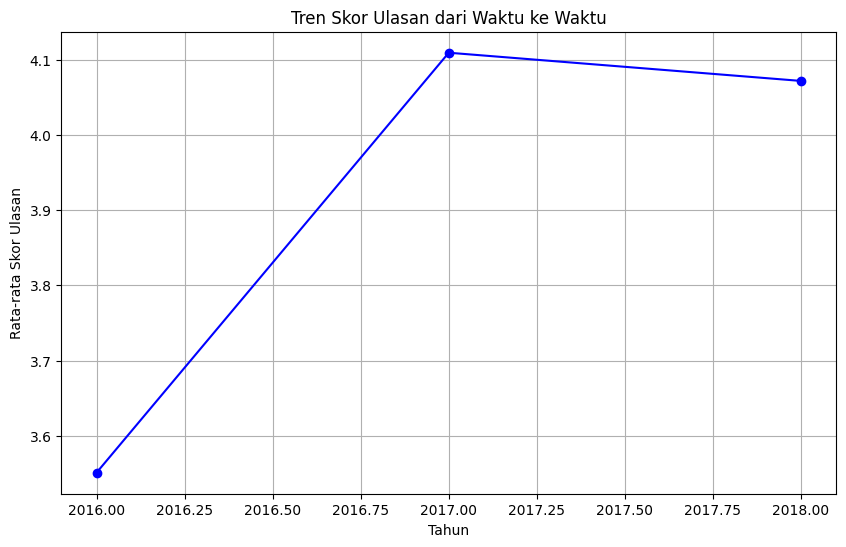

In [15]:
# Visualisasikan tren skor ulasan dari waktu ke waktu menggunakan line chart
plt.figure(figsize=(10, 6))
plt.plot(average_scores_time['year'], average_scores_time['review_score'], marker='o', color='b')
plt.title('Tren Skor Ulasan dari Waktu ke Waktu')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Skor Ulasan')
plt.grid(True)
plt.show()

## Conclusion

- Rata-rata Skor Ulasan untuk Setiap Produk:
Berdasarkan hasil analisis, telah dihitung nilai rata-rata skor ulasan untuk setiap produk dengan menggunakan inner join antara dataset order_items dan order_reviews berdasarkan kolom order_id. Hasilnya ditampilkan dalam dataframe average_scores_per_product. Dari sini, kita dapat melihat nilai rata-rata skor ulasan untuk setiap produk dalam dataset sangat relatif.

- Tren Peningkatan atau Penurunan Skor Ulasan dari Waktu ke Waktu:
Untuk menganalisis tren skor ulasan dari waktu ke waktu, dilakukan ekstraksi tahun dari kolom review_creation_date dalam dataset order_reviews. Kemudian, data dikelompokkan berdasarkan tahun, dan rata-rata skor ulasan untuk setiap tahun dihitung. Hasilnya ditampilkan dalam dataframe average_scores_time. Selanjutnya, tren skor ulasan dari waktu ke waktu divisualisasikan menggunakan line chart. Dari visualisasi ini, kita dapat melihat apakah ada tren peningkatan atau penurunan skor ulasan dari tahun ke tahun.